<a href="https://colab.research.google.com/github/natalia-cortese/machine_learning/blob/master/stock_excersice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program is a testing of what this can do

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

In [10]:
#@title Default title text
# we only need to run this if we are going to upload a file
# the next one just read from the sample data
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [19]:
# Store the data
AAPL = pd.read_csv('/content/sample_data/aapl.csv')
# Show the data
AAPL

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
...,...,...,...,...,...,...,...
6076,1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
6077,1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
6078,1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
6079,1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01


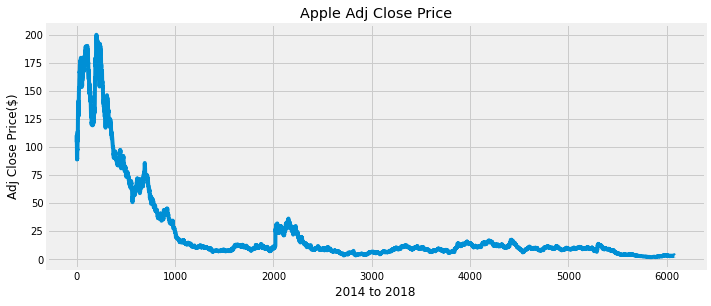

In [20]:
# Visualize the data
plt.figure(figsize=(10.5, 4.5))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.title('Apple Adj Close Price')
plt.xlabel('2014 to 2018')
plt.ylabel('Adj Close Price($)')
plt.show()

In [21]:
# Create the simple moving average with a 30 Day window
SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6076,2.921667
6077,2.921000
6078,2.924333
6079,2.928333


In [23]:
# Create a simple moving 100 day avg
SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6076,3.0145
6077,3.0109
6078,3.0089
6079,3.0059


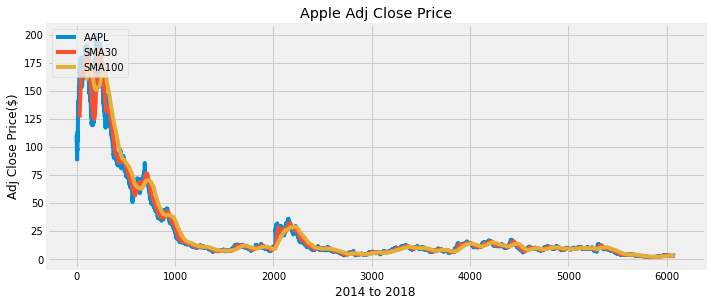

In [24]:
# Visualize the data
plt.figure(figsize=(10.5, 4.5))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.plot(SMA30['Adj Close Price'], label='SMA30')
plt.plot(SMA100['Adj Close Price'], label='SMA100')
plt.title('Apple Adj Close Price')
plt.xlabel('2014 to 2018')
plt.ylabel('Adj Close Price($)')
plt.legend(loc='upper left')
plt.show()

In [25]:
# Create a simple dataframe to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']
data

,AAPL,SMA30,SMA100
0,104.08,NaN,NaN
1,110.26,NaN,NaN
2,96.80,NaN,NaN
3,88.74,NaN,NaN
4,89.79,NaN,NaN
...,...,...,...
6076,3.14,2.921667,3.0145
6077,2.98,2.921000,3.0109
6078,3.07,2.924333,3.0089
6079,3.01,2.928333,3.0059


In [26]:
# Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
    
  return sigPriceBuy, sigPriceSell
    

In [27]:
# Store the buy and sell data into a var
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,104.08,NaN,NaN,NaN,NaN
1,110.26,NaN,NaN,NaN,NaN
2,96.80,NaN,NaN,NaN,NaN
3,88.74,NaN,NaN,NaN,NaN
4,89.79,NaN,NaN,NaN,NaN
...,...,...,...,...,...
6076,3.14,2.921667,3.0145,NaN,NaN
6077,2.98,2.921000,3.0109,NaN,NaN
6078,3.07,2.924333,3.0089,NaN,NaN
6079,3.01,2.928333,3.0059,NaN,NaN


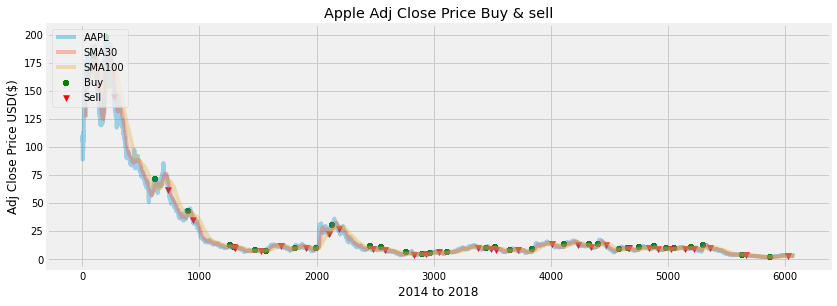

In [28]:
# Visualize the data and the strategy to buy and shell
plt.figure(figsize=(12.5, 4.5))
plt.plot(data['AAPL'], label='AAPL', alpha= 0.35)
plt.plot(data['SMA30'], label='SMA30', alpha= 0.35)
plt.plot(data['SMA100'], label='SMA100', alpha= 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker="+", color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title('Apple Adj Close Price Buy & sell')
plt.xlabel('2014 to 2018')
plt.ylabel('Adj Close Price USD($)')
plt.legend(loc='upper left')
plt.show()
